In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pytesseract


In [6]:
image_path = '../output_videos/player_1_cropped.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

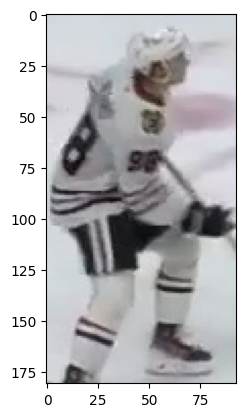

In [7]:
plt.imshow(image)
plt.show()

Take the top half of the image

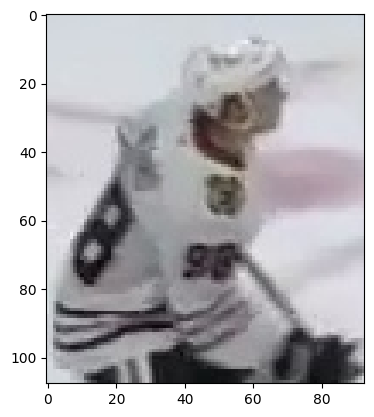

In [13]:
top_half = image[:3*image.shape[0]//5, :]
plt.imshow(top_half)
plt.show()

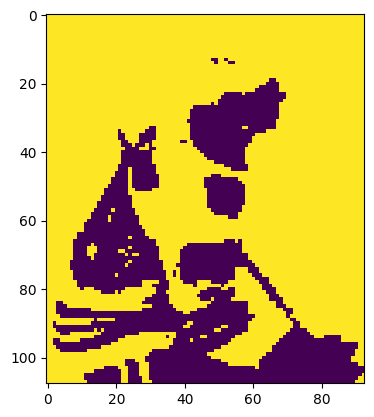

In [18]:
image_2d = top_half.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_


clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])
plt.imshow(clustered_image)
plt.show()

In [20]:
corner_clusters = [clustered_image[0,0], clustered_image[-1,0], clustered_image[0,-1], clustered_image[-1,-1]]
print(corner_clusters)

non_player_cluster = np.argmax(corner_clusters)


[1, 1, 1, 1]
0


In [21]:
player_cluster = 1 - non_player_cluster

print(player_cluster)

1


In [22]:
kmeans.cluster_centers_[player_cluster]

array([194.0534626 , 193.06939058, 198.47603878])